In [1]:
from libdatasets import *
import librun
import libstop
from importlib import reload
from libadversarial import uncertainty_stop
from libstop import rank_stop_conds
from dotenv import load_dotenv; load_dotenv();

In [12]:
def noise():
    pass
matrix = {
    "datasets": [
        #("newsgroups", wrap(newsgroups, None)),
        ("rcv1", wrap(rcv1, None)),
        #("webkb", wrap(webkb, None)),
        #("spamassassin", wrap(spamassassin, None)), not completed
        ("avila", wrap(avila, None)),
        #("smartphone", wrap(smartphone, None)),
        #("swarm", wrap(swarm, None)), not completed
        ("sensorless", wrap(sensorless, None)),
        ("splice", wrap(splice, None)),
        ("anuran", wrap(anuran, None)),
        
    ],
    "dataset_mutators": {
        "noise10": partial(noise, amount=1e-1),
        "noise20": partial(noise, amount=1e-1),
        "noise30": partial(noise, amount=1e-1),
        #"noise40": partial(noise, amount=1e-1),
    },
    "methods": [
        ("uncertainty", partial(uncertainty_stop, n_instances=10)),
    ],
    "models": [
        "svm-linear"
    ],
    "meta": {
        "dataset_size": 1000,
        "labelled_size": 10,
        "test_size": 0.5,
        "n_runs": 10,
        "ret_classifiers": True,
        "ensure_y": True,
        "stop_info": True,
        "aggregate": False,
        "stop_function": ("len1000", lambda learner: learner.y_training.shape[0] >= 1000),
        "pool_subsample": 1000
    }
}


In [13]:
results = librun.run(matrix, force_cache=True, fragment_run_start=0, fragment_run_end=1)
results_plots = [result[0] for result in results]
classifiers = [result[1] for result in results]
classifiers = [clf for clf in classifiers]

['/home/zac/.cache/pypoetry/virtualenvs/research-vDwbEF2m-py3.8/lib/python3.8/site-packages/ipykernel_launcher.py', '-f', '/home/zac/.local/share/jupyter/runtime/kernel-279186f4-027d-4529-bee0-a31f5f67c4b7.json']


Experiment:   0%|          | 0/15 [00:00<?, ?it/s]

## Curve Plotting

In [20]:
passive_results['rcv1']

{0: [0.9516293848689854, 0.9486611796185808, 0.9868740603437008],
 1: [0.9523454340675324, 0.94947023760878, 0.987047116558373],
 2: [0.9521713943317744, 0.9492889058772358, 0.9870433324530108],
 3: [0.9516467888425612, 0.9488167424625231, 0.9870640386864459],
 4: [0.9517536989659553, 0.9487685171251231, 0.9868889998012633],
 5: [0.9521191824110471, 0.949206901826737, 0.9870667834063782],
 6: [0.9521515040762593, 0.9492785135402254, 0.9869761833714209],
 7: [0.951353407573712, 0.9484467631017311, 0.9867064581163754],
 8: [0.9520694567722591, 0.9490638722871321, 0.9869242969829147],
 9: [0.9517959657589251, 0.9488119125567642, 0.9868475288283751]}

In [24]:
reload(librun)

<module 'librun' from '/home/zac/research/librun.py'>

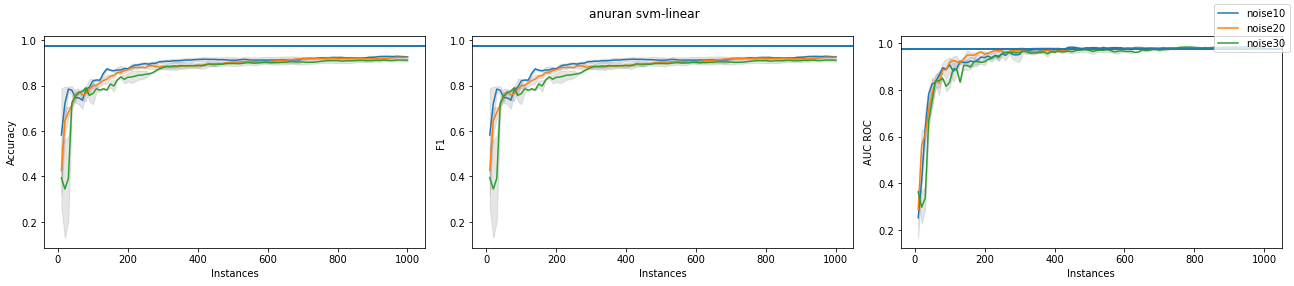

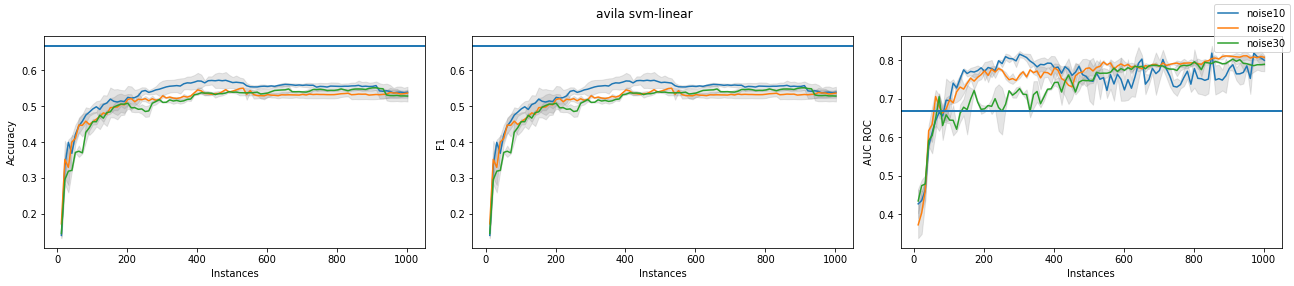

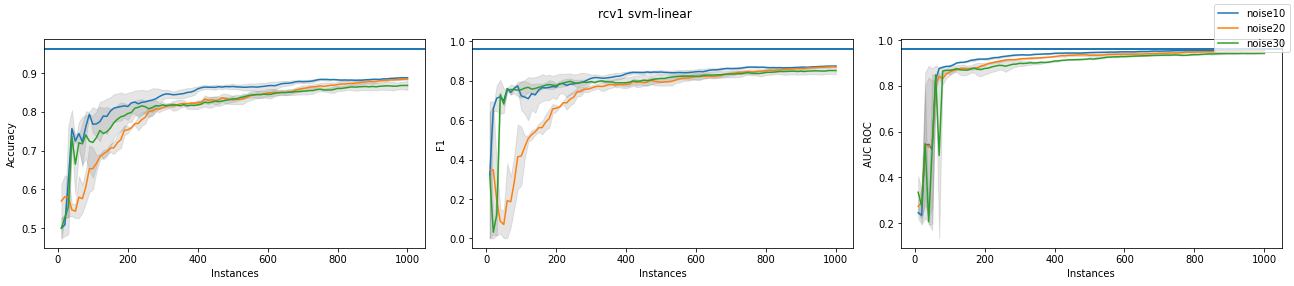

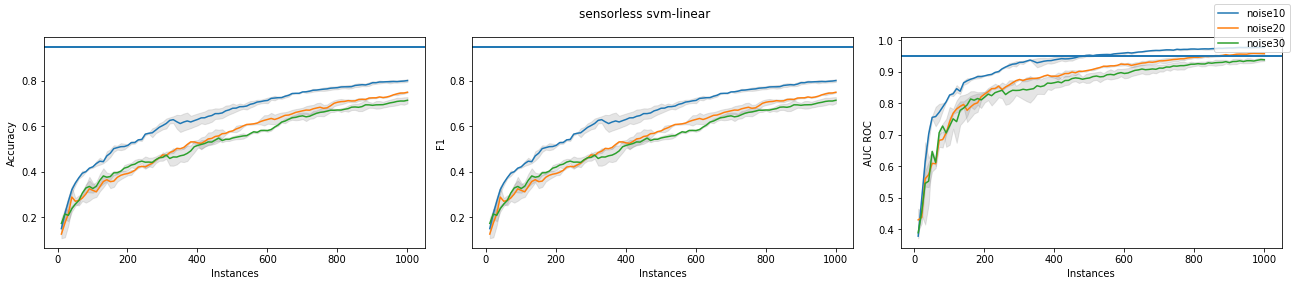

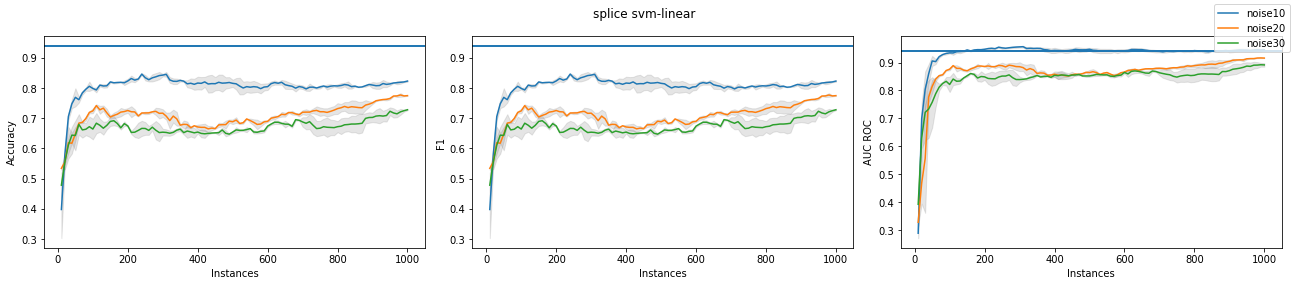

In [28]:
from passive import run_passive
passive_results = run_passive(matrix['datasets'], range(10), matrix['models'][0])

key = lambda config_result: (
    config_result[0].dataset_name,
    #config_result[0].dataset_mutator_name,
    getattr(config_result[0], "model_name", None),
)
lines = {dataset: np.mean(list(runs.values())) for dataset, runs in passive_results.items()}
librun.plot(results_plots, key=key, series=lambda config: config.dataset_mutator_name, hlines=lines)

## Passive comparison

In [4]:
stop_conditions, stop_results = libstop.eval_stopping_conditions(results_plots, classifiers)

In [ ]:
reload(librun)
librun.plot_stop(results_plots, classifiers, stop_conditions, stop_results, figsize=(30, 4))

In [18]:
from passive import run_passive
passive_results = run_passive(matrix['datasets'], range(10), matrix['models'][0])

In [21]:
passive_score([results_plots[2]])

C:\Users\Zac\Programming\python\research\libactive.py:71: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if klass not in Y_labelled:
C:\Users\Zac\Programming\python\research\libactive.py:71: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if klass not in Y_labelled:


([[0.5719762315506997, 0.5333525014376078]],
 [[0.5719762315506997, 0.5333525014376078]],
 [[0.8898795246394817, 0.8876906255789364]])

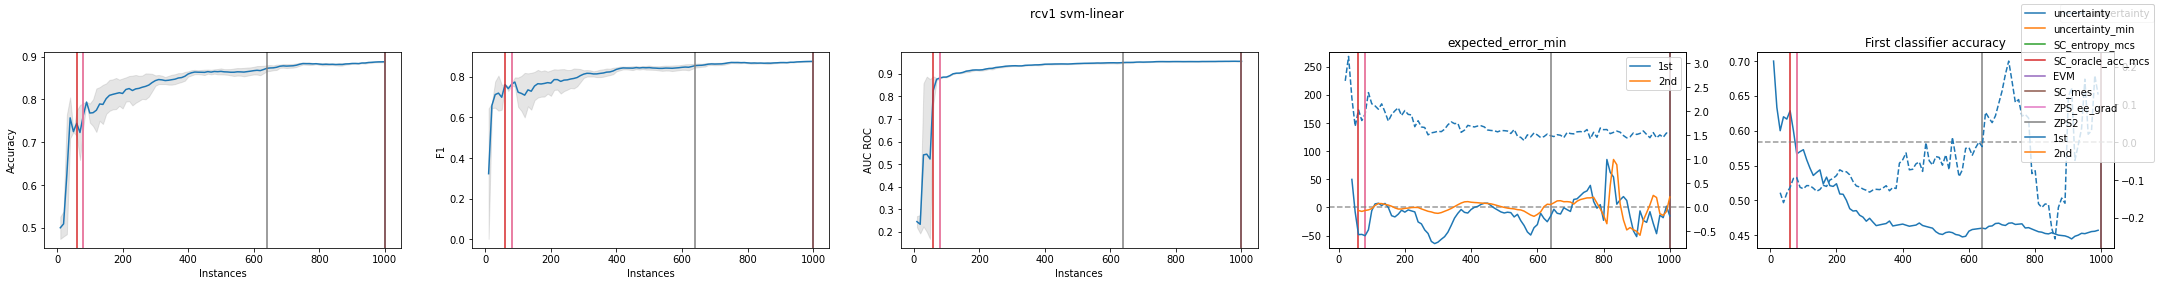

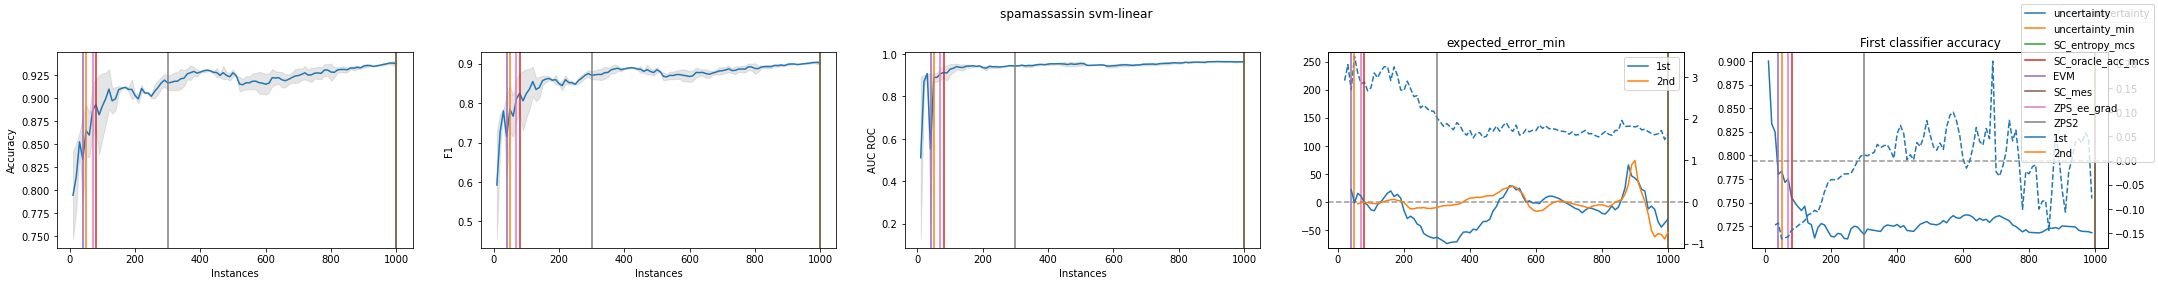

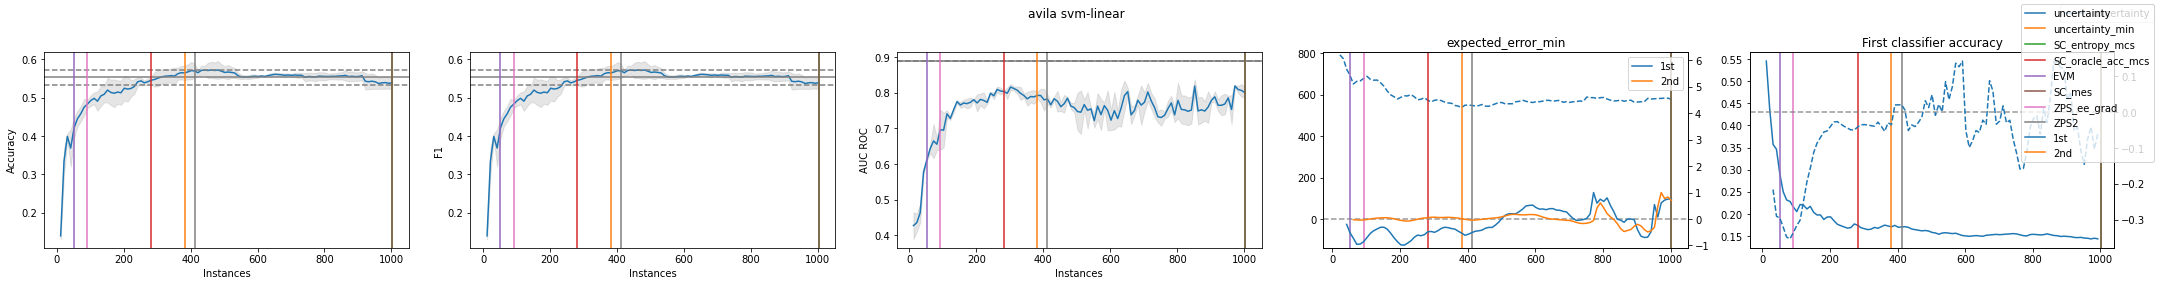

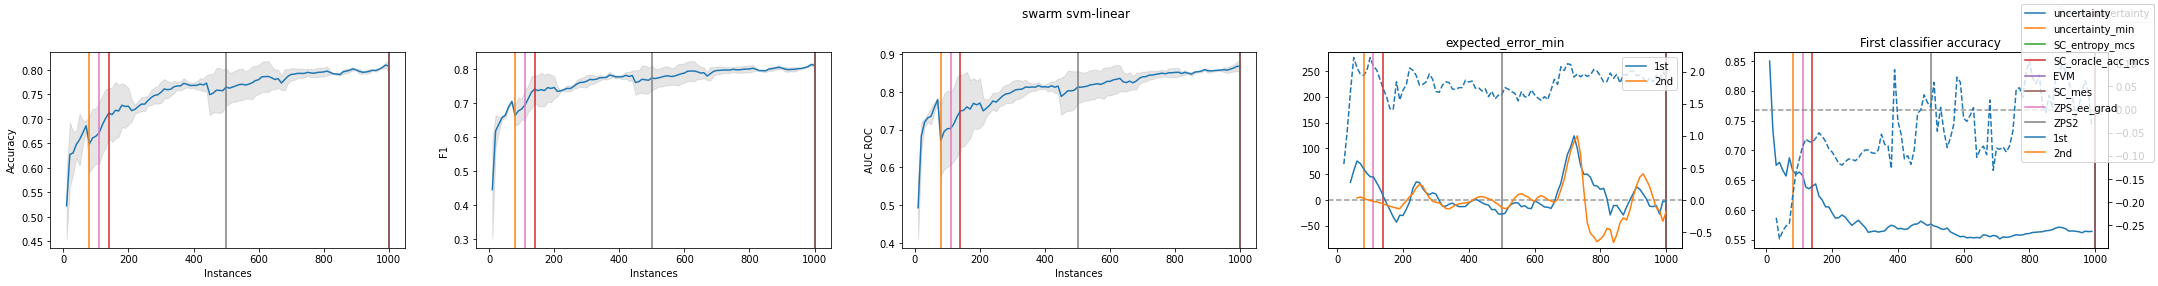

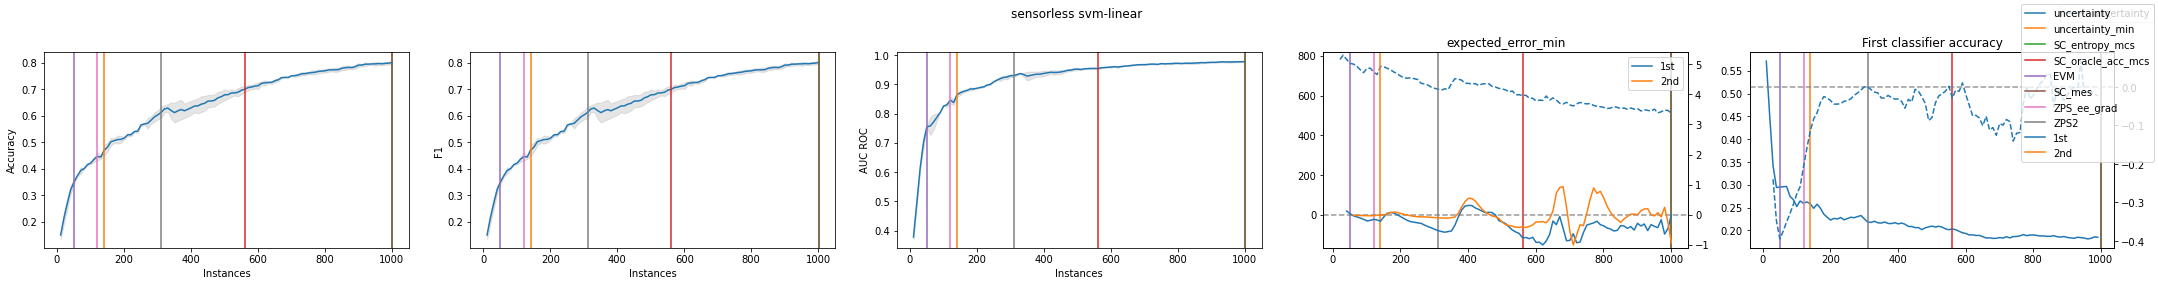

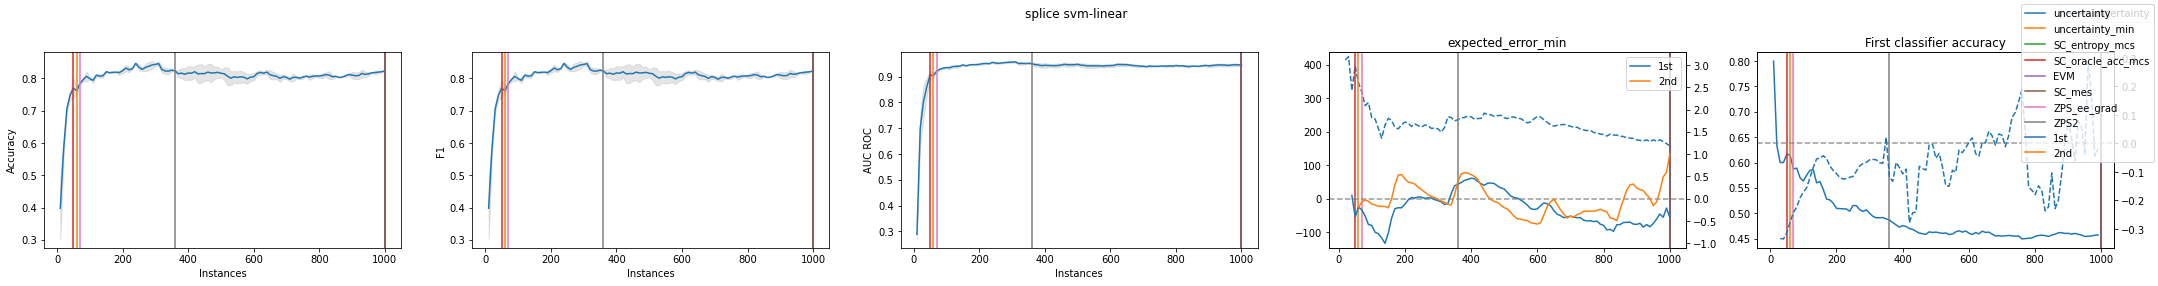

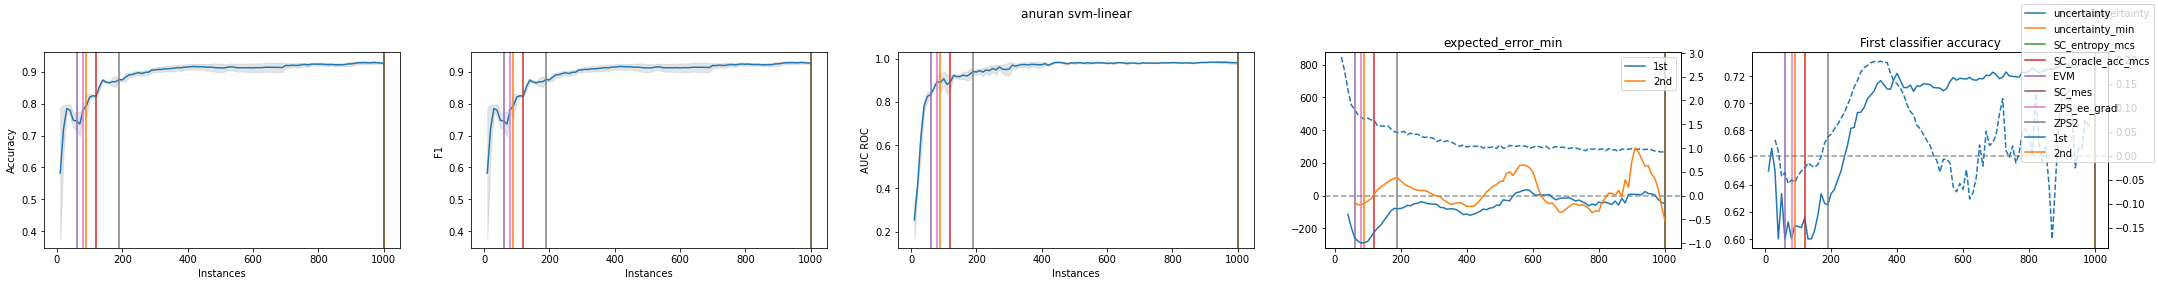

In [24]:
reload(librun)
librun.plot_stop(results_plots, classifiers, stop_conditions, stop_results, figsize=(30, 4), lines=[
    [], [], 
    [[[0.5719762315506997, 0.5333525014376078]], [[0.5719762315506997, 0.5333525014376078]], [[0.8898795246394817, 0.8876906255789364]]],
    [], [], [], [], 
])